# Random Forest: Predicting Player Market Values

## What is Random Forest?
Random Forest is an ensemble learning algorithm that combines multiple decision trees to create a more robust and accurate model. It works by:
1. Creating multiple decision trees using random subsets of data and features
2. Aggregating predictions from all trees (averaging for regression)
3. Reducing overfitting through ensemble learning

## Our Task
We'll use Random Forest to predict player market values based on their attributes. This approach should handle non-linear relationships better than our linear regression model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme
sns.set_theme()

## Understanding Our Dataset
Let's examine the key attributes we'll use to predict player market values:
- Overall Rating (primary indicator of player quality)
- Age (younger players often have higher market value potential)
- League Level (indicates competition quality)
- Contract Valid Until (remaining contract duration affects value)

Random Forest should be particularly effective here because it can capture non-linear relationships and handle interactions between features automatically.

In [2]:
players_df = pd.read_csv("../data/players_data.csv")

# Select features for prediction
features = ["overall", "age", "league_level", "club_contract_valid_until_year"]
# Remove rows with NaN or null values
filtered_df = players_df.dropna(subset=features + ['value_eur'])
X = filtered_df[features].values
y = filtered_df['value_eur'].values

# Scale features and target because they are too big for mse
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (12775, 4)
Test set shape: (5475, 4)


/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_34532/185443496.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [3]:
# Instantiate and train the random forest model
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=10, 
                              random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=42)

## Feature Importance Analysis
Let's analyze which features have the strongest influence on player market values.

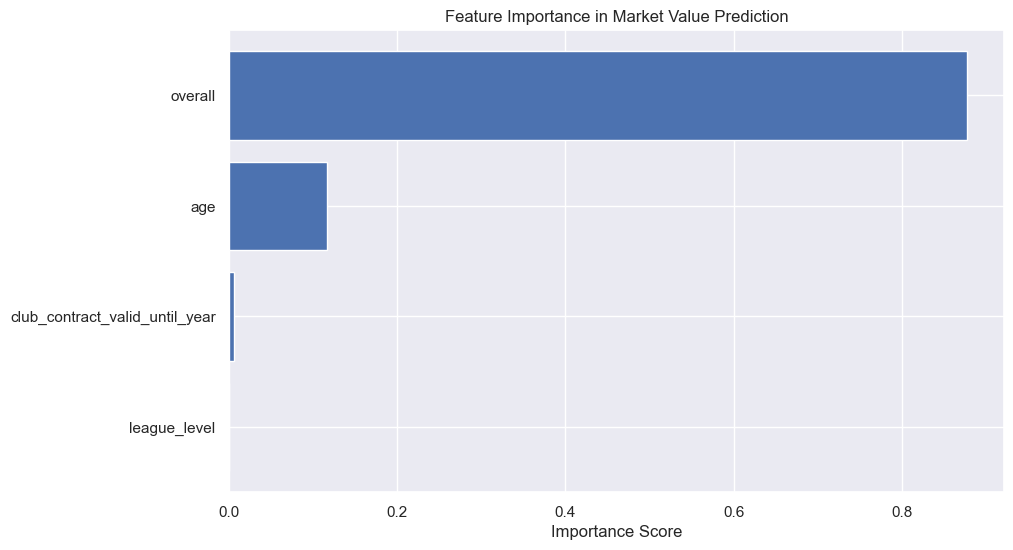

In [4]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_reg.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Market Value Prediction')
plt.xlabel('Importance Score')
plt.show()

## Model Performance Evaluation
Let's evaluate our Random Forest model's performance by comparing predicted vs actual market values.

From the eye test, we see this is workign pretty well. 
Our MSE with the random forest is the least so far. Similar to the KNN strategy, it is able to avoid the mistake of generalization with the patterns found in lower market valued players.

I think we have better performance than KNN here because KNN might suffer more with the really high valued players as there are so little of them. However, with the random classifier decision trees, we are able to navigate that more accurately since we're not necessarily averaging points around us.
 

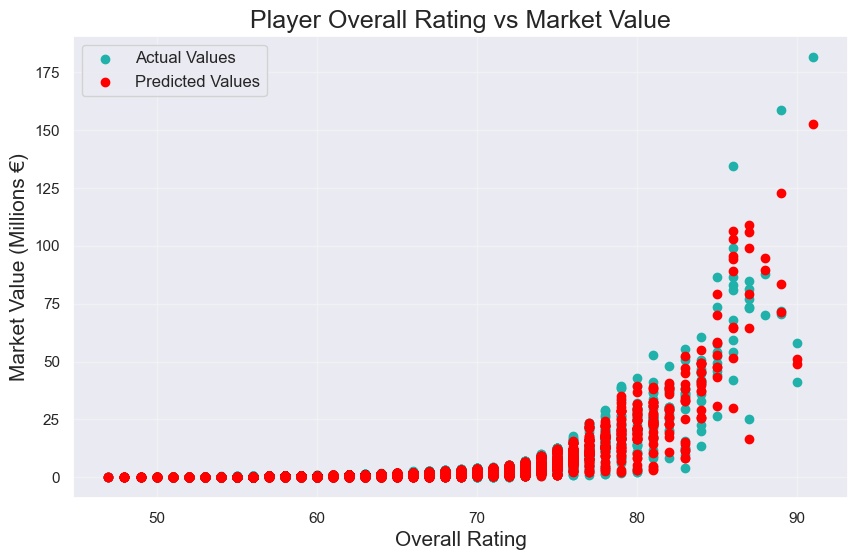

In [5]:
# Plot overall rating vs actual market value
plt.figure(figsize=(10, 6))

# Get original scale values
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
X_test_original = scaler_X.inverse_transform(X_test)
overall_ratings = X_test_original[:, 0]  # overall rating is first feature

# Convert market values to millions for better visualization
y_test_millions = y_test_original / 1_000_000

# Create scatter plot of actual values
plt.scatter(overall_ratings, y_test_millions, color='lightseagreen', label='Actual Values')

y_pred = rf_reg.predict(X_test)
y_pred_millions = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel() / 1_000_000
plt.scatter(overall_ratings, y_pred_millions, color='red', label='Predicted Values')

plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Market Value (Millions €)', fontsize=15)
plt.title('Player Overall Rating vs Market Value', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
# Compute MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0329
